# Optimal Transport, Games, and Graphs

#### *Franck Iutzeler*
Based on an original idea by Rémi Flamary and Nicolas Courty

In [1]:
import numpy as np # always need it
import scipy as sp # often use it
import pylab as pl # do the plots

## 1 - Optimal Transport


We aim at solving the (Kantorovich) Optimal Transport of *croissants* from a number of Bakeries to Cafés in Manhattan. 


Based on Rémi's google map search in Manhattan for bakeries and Cafés:

![bak.png](https://remi.flamary.com/cours/otml/bak.png)

We extracted from this search their positions and generated fictional production and sale number (that **both sum to the same value**).

We have acess to the position of Bakeries ```bakery_pos``` and their respective production ```bakery_prod``` which describe the source distribution. The Cafés where the croissants are sold are defiend also by their position ```cafe_pos``` and ```cafe_prod```. 

### Loading the data

In [2]:
data=np.load('data/manhattan.npz')

bakery_pos=data['bakery_pos']
bakery_prod=data['bakery_prod']
cafe_pos=data['cafe_pos']
cafe_prod=data['cafe_prod']
Imap=data['Imap']

print('Bakery production: \t {} \t total={}'.format(bakery_prod,sum(bakery_prod)))
print('Cafe sale: \t\t {} \t\t\t total={}'.format(cafe_prod,sum(cafe_prod)))

Bakery production: 	 [31. 48. 82. 30. 40. 48. 89. 73.] 	 total=441.0
Cafe sale: 		 [82. 88. 92. 88. 91.] 			 total=441.0


### Plotting bakeries in the city

To have a visual display of what happens, we plot the position of the bakeries and cafés on the map. The size of the circle is proportional to their production.

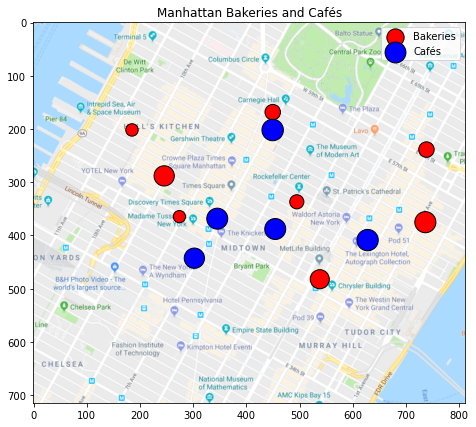

In [3]:

pl.figure(1,(8,7))
pl.clf()
pl.imshow(Imap,interpolation='bilinear') # plot the map
pl.scatter(bakery_pos[:,0],bakery_pos[:,1],s=bakery_prod*5,c='r', edgecolors='k',label='Bakeries')
pl.scatter(cafe_pos[:,0],cafe_pos[:,1],s=cafe_prod*5,c='b', edgecolors='k',label='Cafés')
pl.legend()
pl.title('Manhattan Bakeries and Cafés');


### Formulating the problem

With the notation of the course:

In [4]:
a = bakery_prod
n = len(a)
print(a,n,sum(a))

[31. 48. 82. 30. 40. 48. 89. 73.] 8 441.0


In [5]:
b = cafe_prod
m = len(b)
print(b,m,sum(b))

[82. 88. 92. 88. 91.] 5 441.0


> **Question/Task** In transportation problem, we often hear the term *trivial coupling* to refer to the simplest transport mapping satisfing the constraints (ie the simplest $P\in\mathcal{U}(a,b)$). What can you propose as a trivial coupling? Generate a trivial coupling matrix ``P_triv`` *(this is not critical for the remainder of the lab, so you may skip it if you did not get the previous question)*

In [6]:
P_triv = np.outer(a,b)/sum(a)

In [7]:
sum(P_triv.T)

array([31., 48., 82., 30., 40., 48., 89., 73.])

### Cost matrix


We compute the cost matrix between the bakeries and the cafés, this will be the transport cost matrix. This can be done using the euclidean distance. 

In [8]:
bakery_pos

array([[184.86464733, 201.8163543 ],
       [449.3486663 , 168.40784664],
       [245.41756746, 288.12166576],
       [273.95400109, 364.68282915],
       [494.58935376, 336.8424061 ],
       [738.19305545, 238.70491485],
       [736.10502372, 375.12298779],
       [537.74200949, 482.30861653]])

In [9]:
cafe_pos

array([[302.08410452, 442.78633642],
       [345.1162221 , 368.52123027],
       [449.226184  , 201.94529124],
       [454.08464888, 387.95508982],
       [627.60125204, 408.7770822 ]])

> **Task** Compute the cost matrix ``C`` associated with the problem using the euclidean distance between the bakeries and cafés.

In [10]:
C = np.zeros((n,m))

for i in range(n):
    for j in range(m):
        C[i,j]=np.linalg.norm(bakery_pos[i]-cafe_pos[j],2)
        
print(C.T)

[[267.96815748 311.40071742 164.71872016  83.01482137 219.73253596
  481.49791662 439.26357355 238.94907156]
 [231.23815188 225.63193198 128.0777565   71.2656651  152.79320989
  413.95853979 391.04453224 223.72363138]
 [264.36156811  33.53766825 221.27882795 239.17325174 142.32023317
  291.29559338 335.09697591 294.00449917]
 [327.30267047 219.59831857 231.319397   181.62777429  65.21608356
  320.92553873 282.31215819 126.09973032]
 [488.72123347 299.25132201 400.77686844 356.38557948 151.21760053
  202.86717105 113.60310972 116.11016327]]


### Resolution by Linear Programming



> **Task** Solve the Kantorovich Optimal transportation problem:
$$ \min_{P\in\mathcal{U}(a,b)} \langle C ; P \rangle $$
with the notations of the course by using the linear program solver from scipy: [linprog](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html) . Store the solution in a variable ``P_ot``
*(this is an important one!)*

In [11]:
from scipy.optimize import linprog

In [12]:
c = C.flatten()
c

array([267.96815748, 231.23815188, 264.36156811, 327.30267047,
       488.72123347, 311.40071742, 225.63193198,  33.53766825,
       219.59831857, 299.25132201, 164.71872016, 128.0777565 ,
       221.27882795, 231.319397  , 400.77686844,  83.01482137,
        71.2656651 , 239.17325174, 181.62777429, 356.38557948,
       219.73253596, 152.79320989, 142.32023317,  65.21608356,
       151.21760053, 481.49791662, 413.95853979, 291.29559338,
       320.92553873, 202.86717105, 439.26357355, 391.04453224,
       335.09697591, 282.31215819, 113.60310972, 238.94907156,
       223.72363138, 294.00449917, 126.09973032, 116.11016327])

In [13]:
A_eq = np.zeros((m+n,m*n))

for i in range(n):
    for j in range(m*n):
        if np.floor(j/m) == i:
            A_eq[i,j] = 1
            
for i in range(n,m+n):
    ip = i-n
    for j in range(m*n):
        if j%m == ip:
            A_eq[i,j] = 1

A_eq

array([[1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   

In [14]:
b_eq = np.hstack((a,b))

In [15]:
from scipy.optimize import linprog
res = linprog(c, A_eq=A_eq, b_eq=b_eq)

<ipython-input-15-d9d336357df1>:2: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res = linprog(c, A_eq=A_eq, b_eq=b_eq)


In [16]:
print(res)

     con: array([2.36166287e-09, 3.90602395e-09, 6.99374425e-09, 2.27077734e-09,
       3.17898952e-09, 3.90909349e-09, 7.62723573e-09, 6.17535534e-09,
       6.71637679e-09, 7.26727478e-09, 7.63228059e-09, 7.26549843e-09,
       7.54143059e-09])
     fun: 61523.159707930776
 message: 'Optimization terminated successfully.'
     nit: 9
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([7.73694342e-09, 3.10000000e+01, 4.90414337e-11, 6.59138602e-11,
       2.03572684e-11, 7.21687446e-11, 1.02133204e-10, 4.80000000e+01,
       5.44570019e-11, 5.66153758e-11, 2.50000000e+01, 5.70000000e+01,
       4.29547380e-11, 6.82158365e-11, 2.53125222e-11, 3.00000000e+01,
       4.25525966e-10, 3.42015020e-11, 5.46095214e-11, 1.61894990e-11,
       2.59339746e-10, 6.42618160e-10, 6.58021238e-11, 4.00000000e+01,
       4.90150592e-11, 1.64098839e-10, 5.67986959e-10, 4.40000000e+01,
       2.00000000e+00, 2.00000000e+00, 8.93503408e-11, 9.59771463e-11,
       7.33100620e-11,

In [17]:
P_ot = res.x.reshape((n,m))
P_ot

array([[7.73694342e-09, 3.10000000e+01, 4.90414337e-11, 6.59138602e-11,
        2.03572684e-11],
       [7.21687446e-11, 1.02133204e-10, 4.80000000e+01, 5.44570019e-11,
        5.66153758e-11],
       [2.50000000e+01, 5.70000000e+01, 4.29547380e-11, 6.82158365e-11,
        2.53125222e-11],
       [3.00000000e+01, 4.25525966e-10, 3.42015020e-11, 5.46095214e-11,
        1.61894990e-11],
       [2.59339746e-10, 6.42618160e-10, 6.58021238e-11, 4.00000000e+01,
        4.90150592e-11],
       [1.64098839e-10, 5.67986959e-10, 4.40000000e+01, 2.00000000e+00,
        2.00000000e+00],
       [8.93503408e-11, 9.59771463e-11, 7.33100620e-11, 1.18020634e-10,
        8.90000000e+01],
       [2.70000000e+01, 4.83813603e-10, 4.37972128e-11, 4.60000000e+01,
        6.39299767e-11]])

> **Task** Check that ``P_ot`` satisfy the constraints (at least up to some small error). You can manually trim all values smaller than 1e-8 to 0.

In [18]:
P_ot[P_ot<1e-8] = 0
P_ot

array([[ 0.        , 30.99999999,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , 48.        ,  0.        ,  0.        ],
       [24.99999999, 57.        ,  0.        ,  0.        ,  0.        ],
       [30.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 40.        ,  0.        ],
       [ 0.        ,  0.        , 44.        ,  2.        ,  2.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 88.99999999],
       [27.        ,  0.        ,  0.        , 46.        ,  0.        ]])

In [19]:
sum(P_ot.T)

array([30.99999999, 48.        , 81.99999999, 30.        , 40.        ,
       48.        , 88.99999999, 72.99999999])

In [20]:
a

array([31., 48., 82., 30., 40., 48., 89., 73.])

### Transportation plan vizualization

A good vizualization of the ``P_ot`` OT matrix in the 2D plane is to denote the transportation of mass between a Bakery and a Café by a line. The size of the line will be proportional to the amount of mass transported.

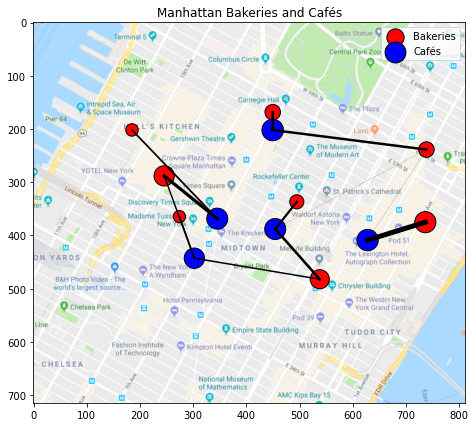

In [21]:
pl.figure(1,(8,7))
pl.clf()
pl.imshow(Imap,interpolation='bilinear') # plot the map
pl.scatter(bakery_pos[:,0],bakery_pos[:,1],s=bakery_prod*5,c='r', edgecolors='k',label='Bakeries')
pl.scatter(cafe_pos[:,0],cafe_pos[:,1],s=cafe_prod*5,c='b', edgecolors='k',label='Cafés')

for i in range(n):
    for j in range(m):
        pl.plot([bakery_pos[i,0],cafe_pos[j,0]],[bakery_pos[i,1],cafe_pos[j,1]],color="black",linewidth=5*P_ot[i,j]/P_ot.max())

pl.legend()
pl.title('Manhattan Bakeries and Cafés');

> **Question/Task** The transport plan you have obtain should contain around 10 edges. Would it be the case for the trivial coupling?

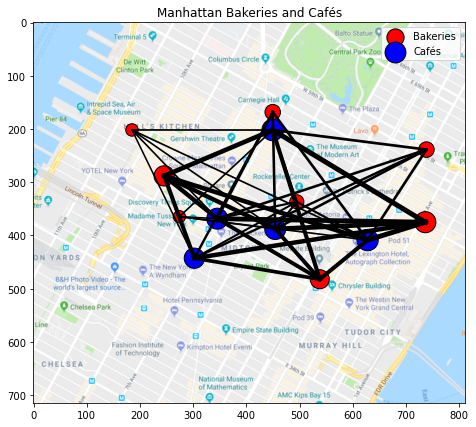

In [22]:
pl.figure(1,(8,7))
pl.clf()
pl.imshow(Imap,interpolation='bilinear') # plot the map
pl.scatter(bakery_pos[:,0],bakery_pos[:,1],s=bakery_prod*5,c='r', edgecolors='k',label='Bakeries')
pl.scatter(cafe_pos[:,0],cafe_pos[:,1],s=cafe_prod*5,c='b', edgecolors='k',label='Cafés')

for i in range(n):
    for j in range(m):
        pl.plot([bakery_pos[i,0],cafe_pos[j,0]],[bakery_pos[i,1],cafe_pos[j,1]],color="black",linewidth=5*P_triv[i,j]/P_triv.max())

pl.legend()
pl.title('Manhattan Bakeries and Cafés');